In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import ktrain
# from ktrain import text

In [2]:
data=pd.read_csv(r'../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Preprocessing

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


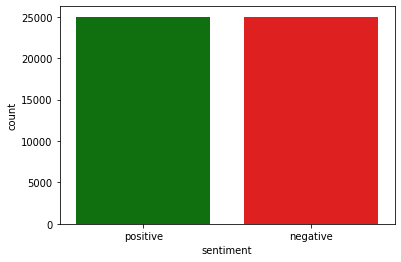

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [3]:
sns.countplot(data["sentiment"], palette = ["green","red"])
plt.show()
print(data.sentiment.value_counts())

### number of positive reviews and negative reviews are equal

## 1)Lower Case

In [4]:
data['review'][2].lower()

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [5]:
data['review'] = data['review'].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


## 2)Removing html tags

In [6]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [7]:
text = "<html><body><p> Movie - Phir Hera Pheri</p><p> Actor - Akshay Kumar</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"
remove_html_tags(text)

' Movie - Phir Hera Pheri Actor - Akshay Kumar Click here to download'

In [8]:
#before
data['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [9]:
data['review'] = data['review'].apply(remove_html_tags)

In [10]:
#After
data['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

## 3)Removing urls

In [11]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [12]:
text1= 'Click here to download www.google.com'
text1=remove_url(text1)
text1

'Click here to download '

In [13]:
data['review'] = data['review'].apply(remove_url)

## 4)Removing puntuations

In [14]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
remove = string.punctuation

In [16]:
def remove_punc(text):
    for char in remove:
        text = text.replace(char,'')
    return text

In [17]:
print(remove_punc(text))

htmlbodyp Movie  Phir Hera Pheripp Actor  Akshay Kumarpp Click here to a hrefhttpgooglecomdownloadapbodyhtml


In [18]:
data['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [19]:
print(remove_punc(data['review'][5]))

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


In [20]:
data['review'] = data['review'].apply(remove_punc)

## 5)Removing chatwords

In [21]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [22]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_words_conversion("one minute BRB")

'one minute Be Right Back'

In [23]:
chat_words_conversion('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [24]:
data['review'] = data['review'].apply(chat_words_conversion)

## 6)textblob (incorrect text)

In [25]:
#!pip install textblob

In [26]:
from textblob import TextBlob
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

textBlb = TextBlob(incorrect_text)

textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

In [27]:
def correct(text):
    textblb = TextBlob(text)
    
    return textblb.correct().string

In [28]:
# import nltk
# nltk.download('stopwords')

##  7)Removing stopwords

In [29]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [30]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['review'] = data['review'].apply(lambda text: remove_stopwords(text))
data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [31]:
#Removing the noisy text
def denoise_text(text):
    return text

data['review']=data['review'].apply(denoise_text)

## 8)Removing emoticons , special characters and digits

In [32]:
import re

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text
s = "Well this was fun! See you at 7:30, What do you think!!? #$@@9318@ 🙂🙂🙂"
s
'Well this was fun! See you at 7:30, What do you think!!? #$@@9318@ 🙂🙂🙂'
remove_special_characters(s, remove_digits=False)
'Well this was fun See you at 730 What do you think 9318 '
remove_special_characters(s)

'Well this was fun See you at  What do you think  '

In [33]:
data['review']=data['review'].apply(remove_special_characters)

## 9)Stemming

In [34]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [35]:
data['review']=data['review'].apply(ps.stem)

In [36]:
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

# Word Cloud after preprocessing

In [37]:
!pip install WordCloud
#!py -m pip install WordCloud
#py

In [38]:
from wordcloud import WordCloud

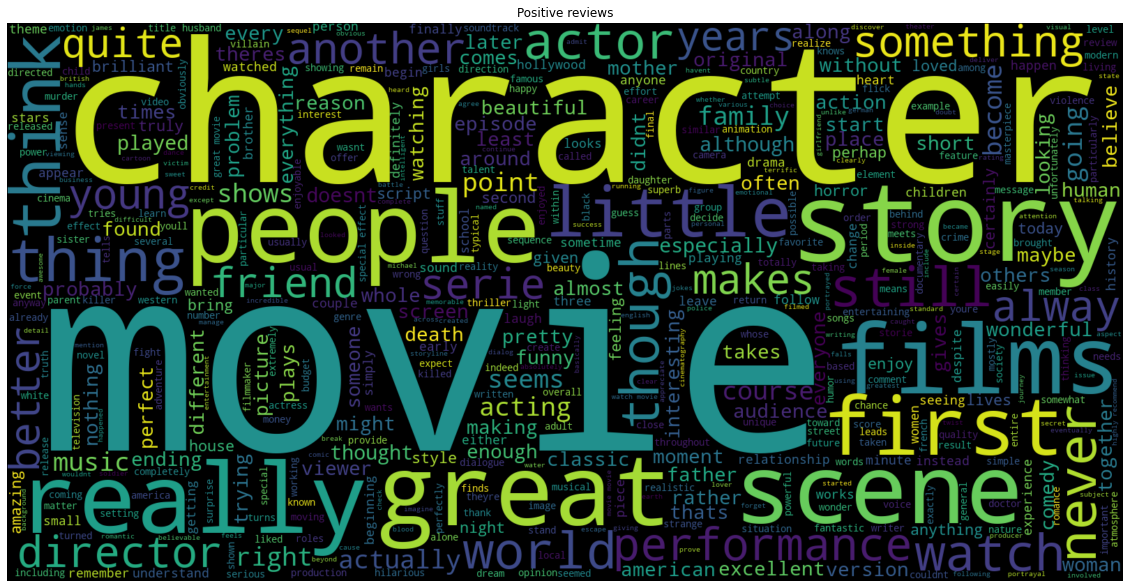

In [39]:
# POSITIVE REVIEWS
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

plt.axis("off")
plt.title('Positive reviews')
plt.imshow(Wc , interpolation = 'bilinear')

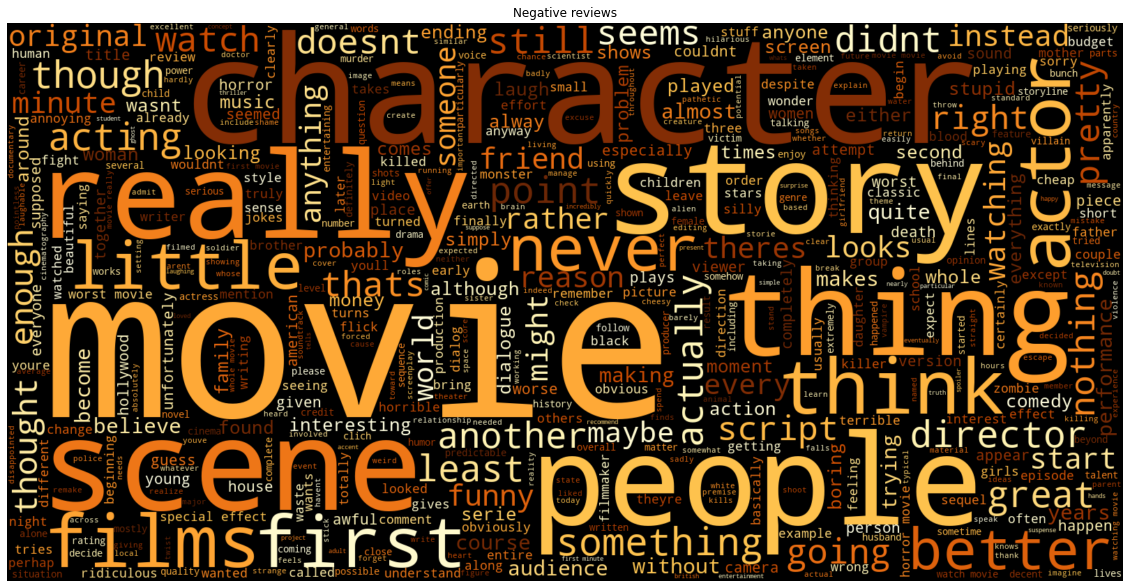

In [40]:


# Negative Reviews
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))

plt.axis("off")
plt.title('Negative reviews')
plt.imshow(Wc , interpolation = 'bilinear')

In [41]:
sentiment = data['sentiment'].values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
data = data['review']
data1=data.copy()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(data)
vector = vectorizer.transform(data)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vector,sentiment,test_size = 0.2, random_state = 42)

In [45]:
# from tensorflow.python.keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer(num_words = 15000)
# tokenizer.fit_on_texts(data)
# #tokenizer.word_index

In [46]:
x_train

<40000x216443 sparse matrix of type '<class 'numpy.int64'>'
	with 3951364 stored elements in Compressed Sparse Row format>

In [47]:
y_train.shape

(40000,)

# Through ML models..

## 1)Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_for = RandomForestClassifier(n_estimators=101 ,criterion='entropy', max_depth=251)
model_for.fit(x_train,y_train)
y_pred = model_for.predict(x_test)
a0=model_for.score(x_test,y_test)
print('Random Forest:',a0)

Random Forest: 0.8568


## 2)Naive Bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB 

In [50]:
clf=BernoulliNB()
clf1=MultinomialNB()
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

MultinomialNB()

In [51]:
y_predict=clf.predict(x_test)
y_predict1=clf1.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,y_predict)
a2=accuracy_score(y_test,y_predict1)
print('Bernoulli:',a1)
print('Multinomial:',a2)

Bernoulli: 0.8537
Multinomial: 0.8608


## 3)KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [54]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
a3=accuracy_score(y_test,y_pred)
print('knn:',a3)

knn: 0.6113


# Through DL models..

In [55]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences

In [56]:
tokenizer=Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\]^_`{|}~')

tokenizer.fit_on_texts(data1) #learns a vocabulary 
#print("Word Indices:", tokenizer.word_index) #tokenizer.word_index is a dictionary

In [57]:
vocab_size = len(tokenizer.word_index)+1

In [58]:
data1[0]

'one reviewers mentioned watching  oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle c

In [59]:
#len(sequences[0])

In [60]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size:", vocab_size)

sequences=tokenizer.texts_to_sequences(data1) #list of list
l=len(sequences)
#print("Sequences:",sequences, type(sequences), l)

Vocab Size: 216470


In [61]:
maxlen = max([len(sequence) for sequence in sequences])
print("Maxlen:",maxlen)

Maxlen: 1420


In [62]:
X=pad_sequences(sequences,maxlen=maxlen+1,padding='pre') # +1 to have 0 as the first input
print("X:",X, type(X), X.shape)

X: [[    0     0     0 ...  1058  3815  5373]
 [    0     0     0 ...  1757    14  6676]
 [    0     0     0 ...    52    10   319]
 ...
 [    0     0     0 ... 20683 22717  1403]
 [    0     0     0 ... 11862  4032 29451]
 [    0     0     0 ...  4073   709   533]] <class 'numpy.ndarray'> (50000, 1421)


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,sentiment,test_size = 0.1, random_state = 42)

In [64]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.1, random_state = 42)

In [65]:
x_train.shape, x_val.shape, x_test.shape

((40500, 1421), (4500, 1421), (5000, 1421))

In [66]:
sentiment.shape

(50000,)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

2022-05-03 18:07:58.930582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 18:07:59.018689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 18:07:59.019507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-03 18:07:59.020996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [68]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, verbose=0)

2022-05-03 18:08:01.917561: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-03 18:08:04.500411: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [69]:
a4=result=model.evaluate(x_test,y_test)
print('accuracy',a4)

157/157 [==============================] - 3s 21ms/step - loss: 0.2942 - accuracy: 0.8998
accuracy [0.2942417562007904, 0.8998000025749207]


In [70]:
from keras.models import load_model
model.save("epoch1.h5")

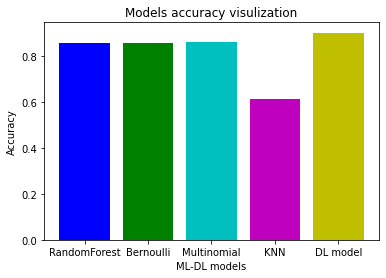

In [71]:
from matplotlib import pyplot as plt
t=[a0,a1,a2,a3,a4[1]]
p=['RandomForest','Bernoulli','Multinomial','KNN','DL model']

#plt.plot(p,t)
plt.bar(p,t,color=['b','g','c','m','y'])
plt.title('Models accuracy visulization')
plt.xlabel('ML-DL models')
plt.ylabel('Accuracy')
#plt.grid(True)
plt.show()

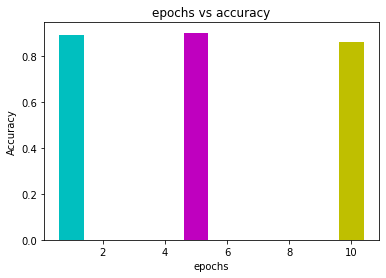

In [72]:
#from matplotlib import pyplot as plt
t=[0.89,a4[1],0.86]
epochs=[1,5,10]

#plt.plot(p,t)
plt.bar(epochs,t,color=['c','m','y'])
plt.title('epochs vs accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
#plt.grid(True)
plt.show()